# Feature Extraction and Preprocessing

Many machine learning problems require learning from observations of categorical variables, text, or images and it becomes obvious to learn basic techniques for preprocessing data and creating feature representations of these observations.

## Extracting Features from categorical variable

Many machine learning problems have categorical, or nominal, rather than continuous features. For example, an application that predicts a job's salary based on its description might use categorical features such as the job's location. Categorical variables are commonly encoded using one-of-K or one-hot encoding, in which the explanatory variable is encoded using one binary feature for each of the variable's possible values.

For example, let's assume that our model has a city explanatory variable that
can take one of three values: New York, San Francisco, or Chapel Hill. One-hot
encoding represents this explanatory variable using one binary feature for each
of the three possible cities.

In [1]:
from sklearn.feature_extraction import DictVectorizer
onehot_encoder = DictVectorizer()
instances = [
        {'city':'New York'},
        {'city': 'San Francisco'},
        {'city': 'Chapel Hill'}
]
print onehot_encoder.fit_transform(instances).toarray()

[[ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]]


In [2]:
#for the curious ones
print type(onehot_encoder.fit_transform(instances))

<class 'scipy.sparse.csr.csr_matrix'>


[ class 'scipy.sparse.csr.csr_matrix'](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html)

## Extracting Features from text
Many machine learning problems use text as an explanatory variable. Text must be transformed to a different representation that encodes as much of its meaning as possible in a feature vector.

### Bag-of-words representation
The most common representation of text is the bag-of-words model. This
representation uses a multiset, or bag, that encodes the words that appear in a text; the bag-of-words does not encode any of the text's syntax, ignores the order of words, and disregards all grammar.

Bag-of-words creates one feature for each word of interest in the text. The bag-of-words model is motivated by the intuition that documents containing similar words often have similar meanings. The bag-of-words model can be used effectively for document classification and retrieval despite the limited information that it encodes.

In [3]:
corpus = [
    'UNC played Duke in basketball',
    'Duke lost the basketball game'
]

The corpus's unique words comprise its vocabulary. The bag-of-words
model uses a feature vector with an element for each of the words in the corpus's vocabulary to represent each document. Our corpus has eight unique words, so each document will be represented by a vector with eight elements. The number of elements that comprise a feature vector is called the vector's dimension. A dictionary maps the
vocabulary to indices in the feature vector.

In the most basic bag-of-words representation, each element in the feature vector is a binary value that represents whether or not the corresponding word appeared in the document. For example, the first word in the first document is UNC. The first word in
the dictionary is UNC, so the first element in the vector is equal to one. The last word in the dictionary is game. The first document does not contain the word game, sothe eighth element in its vector is set to 0. 

The CountVectorizer class can produce
a bag-of-words representation from a string or file. By default, CountVectorizer converts the characters in the documents to lowercase, and tokenizes the documents.
Tokenization is the process of splitting a string into tokens, or meaningful sequences of characters. Tokens frequently are words, but they may also be shorter sequences
including punctuation characters and affixes. The CountVectorizer class tokenizes using a regular expression that splits strings on whitespace and extracts sequences of characters that are two or more characters in length.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
print vectorizer.fit_transform(corpus).todense()
print vectorizer.vocabulary_

[[1 1 0 1 0 1 0 1]
 [1 1 1 0 1 0 1 0]]
{u'duke': 1, u'basketball': 0, u'lost': 4, u'played': 5, u'game': 2, u'unc': 7, u'in': 3, u'the': 6}


In [5]:
corpus += ['I ate a sandwich']
print vectorizer.fit_transform(corpus).todense()
print vectorizer.vocabulary_
print "Size of vocab: %d" % len(vectorizer.vocabulary_)

[[0 1 1 0 1 0 1 0 0 1]
 [0 1 1 1 0 1 0 0 1 0]
 [1 0 0 0 0 0 0 1 0 0]]
{u'duke': 2, u'basketball': 1, u'lost': 5, u'played': 6, u'in': 4, u'game': 3, u'sandwich': 7, u'unc': 9, u'ate': 0, u'the': 8}
Size of vocab: 10


The meanings of the first two documents are more similar to each other than they are to the third document, and their corresponding feature vectors are more similar to each other than they are to the third document's feature vector when using a metric such as Euclidean distance.

scikit-learn's `euclidean_distances` function can be used to calculate the distance between two or more vectors, and it confirms that the most semantically similar documents are also the closest to each other in space.

In [6]:
from sklearn.metrics.pairwise import euclidean_distances
count = vectorizer.fit_transform(corpus).todense()
print euclidean_distances(count[0],count [1])
print euclidean_distances(count[1],count [2])
print euclidean_distances(count[0],count [2])

[[ 2.44948974]]
[[ 2.64575131]]
[[ 2.64575131]]


This implies that distance between 1<sup>st</sup> and 2<sup>nd</sup> document is less than 1<sup>st</sup> and 3<sup>rd</sup> and 2<sup>nd</sup> and 3<sup>rd</sup> document.


Assume that we are using a corpus of news articles instead of our toy corpus. Our dictionary may now have hundreds of thousands of unique words instead of only twelve. The feature vectors representing the articles will each have hundreds of thousands of elements, and many of the elements will be zero eg. most sports articles will not have any of the words particular to finance articles. High-dimensional feature vectors that have many zero-valued elements are called **sparse vectors**.

The second problem is known as the **curse of dimensionality**, or the Hughes effect.As the feature space's dimensionality increases, more training data is required to ensure that there are enough training instances with each combination of the feature's values

### Stop-word Filtering
Words that are common to most of the documents in the corpus are called *stop words*. Eg. determiners such as the, a, and
an; auxiliary verbs such as do, be, and will; and prepositions such as on, around, and
beneath.

In [7]:
vectorizer_2 = CountVectorizer(stop_words='english')
print vectorizer_2.fit_transform(corpus).todense()
print vectorizer_2.vocabulary_
print "Size of vocab: %d" % len(vectorizer_2.vocabulary_)

[[0 1 1 0 0 1 0 1]
 [0 1 1 1 1 0 0 0]
 [1 0 0 0 0 0 1 0]]
{u'duke': 2, u'basketball': 1, u'lost': 4, u'played': 5, u'game': 3, u'sandwich': 6, u'unc': 7, u'ate': 0}
Size of vocab: 8


### Stemming and Lemmatization
While stop filtering is an easy strategy for dimensionality reduction, most stop lists contain only a few hundred words. A large corpus may still have hundreds of thousands of unique words after filtering eg. ate and eat convey the act of eating only but are percieved diffrent for computer, hence we use stemming and lemmatization.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
corpus= [
    'He ate the sandwiches',
    'Every sandwich was eaten by him'
]
vectorizer = CountVectorizer(binary= True, stop_words='english')
print vectorizer.fit_transform(corpus).todense()
print vectorizer.vocabulary_
print "Size of vocab: %d" %len(vectorizer.vocabulary_)

[[1 0 0 1]
 [0 1 1 0]]
{u'sandwich': 2, u'ate': 0, u'sandwiches': 3, u'eaten': 1}
Size of vocab: 4


As you can see here both the sentence imply the same meaning but the vectors are different also, *sandwhich* and *sandwiches* are considered as diffrent but in context they are same. *ate* and *eaten* is another such example where the difference in form of verb causes the word to be treated as unique.

**Lemmatization** is the process of determining the lemma, or the morphological root, of an inflected word based on its context. 

**Stemming** is the process of removing all the pattern and prefixes or suffixes from the words like *ing*, *'s*.

Lemmatization frequently requires a lexical resource, like WordNet, and the word's part of speech. Stemming algorithms frequently use rules instead of lexical resources to produce stems and can operate on any token, even without its context.

There's a package in python specifically for language processing called `nltk`. We'll be using nltk for lemmetization and stemming.

In [9]:
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print lemmatizer.lemmatize('gathering', 'v')
print lemmatizer.lemmatize('gathering', 'n')

gather
gathering


In [10]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
print stemmer.stem('gathering')

gather


In [11]:
corpus = [
    'I am gathering ingredients for the sandwich.',
    'There were many wizards at the gathering.'
]

In [12]:
from nltk import word_tokenize 
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag

corpus=[
    'He ate the sandwiches.',
    'Every sandwich was eaten by him.'
]

wordnet_tag = ['n', 'v']
stemmer = PorterStemmer()

print "Stemmed: %s"% str([[stemmer.stem(token) for token in 
                           word_tokenize(document)]for document in corpus])

def lemmatize(token, tag):
    if tag[0].lower() in wordnet_tag:
        return lemmatizer.lemmatize(token, tag[0].lower())
    return token
lemmatizer = WordNetLemmatizer()
tagged_corpus = [ pos_tag(word_tokenize(document)) for document in corpus]

lemmetized = [[lemmatize(token, tag) for token, tag in document]
                      for document in tagged_corpus]

print 'Lemmatized: ',lemmetized
reduced_corpus = [' '.join(i).strip() for i in lemmetized]

print "\nParts Of Speech tagged corpus: \n", tagged_corpus
print "Generated token: ", [[i for i in 
                           word_tokenize(document)]for document in corpus]


Stemmed: [['He', 'ate', 'the', u'sandwich', '.'], [u'everi', 'sandwich', u'wa', 'eaten', 'by', 'him', '.']]
Lemmatized:  [['He', u'eat', 'the', u'sandwich', '.'], ['Every', 'sandwich', u'be', u'eat', 'by', 'him', '.']]

Parts Of Speech tagged corpus: 
[[('He', 'PRP'), ('ate', 'VBD'), ('the', 'DT'), ('sandwiches', 'NNS'), ('.', '.')], [('Every', 'DT'), ('sandwich', 'NN'), ('was', 'VBD'), ('eaten', 'VBN'), ('by', 'IN'), ('him', 'PRP'), ('.', '.')]]
Generated token:  [['He', 'ate', 'the', 'sandwiches', '.'], ['Every', 'sandwich', 'was', 'eaten', 'by', 'him', '.']]


In [13]:
vectorizer = CountVectorizer(binary= True, stop_words='english')
print reduced_corpus
print vectorizer.fit_transform(reduced_corpus).todense()
print vectorizer.vocabulary_
print "Size of vocab: %d" %len(vectorizer.vocabulary_)

[u'He eat the sandwich .', u'Every sandwich be eat by him .']
[[1 1]
 [1 1]]
{u'sandwich': 1, u'eat': 0}
Size of vocab: 2


The size of vocab is reduced by **50%**, hence lemmatization and stemming is a very fundamental dimesionality reduction technique in NLP.

### Extending bag-of-words with TF-IDF weights
#### TF-IDF: Term Frequency- Inverse Document Frequency
[read more](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)

It is intuitive that the frequency with which a word appears
in a document could indicate the extent to which a document pertains to that word. 
A long document that contains one occurrence of a word may discuss an entirely different topic than a document that contains many occurrences of the same word.

Instead of using a binary value for each element in the feature vector, we will
now use an integer that represents the number of times that the words appeared
in the document.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['The dog ate a sandwich, the wizard transfigured a sandwich, and I ate a sandwich']

vectorizer = CountVectorizer(stop_words='english')
print vectorizer.fit_transform(corpus).toarray()
print vectorizer.vocabulary_

[[2 1 3 1 1]]
{u'sandwich': 2, u'wizard': 4, u'dog': 1, u'transfigured': 3, u'ate': 0}


Many words might appear with the same frequency in two documents, but the documents could still be dissimilar if one document is many times larger than the other.
scikit-learn's `TfdfTransformer` object can mitigate this problem by
transforming a matrix of term frequency vectors into a matrix of normalized term frequency weights. By default, TfdfTransformer smoothes the raw counts and applies L2 normalization

Another problem remains with these representations. The feature vectors contain large weights for terms that occur frequently in a document, even if those terms occur frequently in most documents in the corpus. These terms do not help to represent the meaning of a particular document relative to the rest of the corpus. For example, most of the documents in a corpus of articles about Duke's basketball team could include the words basketball, Coach K, and flop. These words can be thought of as corpus-specific stop words and may not be useful to calculate the similarity of documents. The inverse document frequency (IDF) is a measure of how rare or common a word is in a corpus.

A term's TF-IDF value is the product of its term frequency and inverse document frequency.`TfidfTransformer` returns TF-IDF's weight when its `use_idf` keyword argument is set to its default value, True.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

corpus = ['The dog and I ate a sandwich', 
         'The wizard transfigured a sandwich']
vectorizer = TfidfVectorizer(stop_words='english')
print vectorizer.fit_transform(corpus).todense()
print vectorizer.vocabulary_

[[ 0.6316672   0.6316672   0.44943642  0.          0.        ]
 [ 0.          0.          0.44943642  0.6316672   0.6316672 ]]
{u'sandwich': 2, u'wizard': 4, u'dog': 1, u'transfigured': 3, u'ate': 0}


By comparing the TF-IDF weights to the raw term frequencies, we can see that words that are common to many of the documents in the corpus, such as sandwich, have been penalized.

In [16]:
vectorizer = CountVectorizer(stop_words='english')
print vectorizer.fit_transform(corpus).todense()
print vectorizer.vocabulary_

[[1 1 1 0 0]
 [0 0 1 1 1]]
{u'sandwich': 2, u'wizard': 4, u'dog': 1, u'transfigured': 3, u'ate': 0}


#### Hashing technique to save space

For small corpus making a vocab dictionary doesn't harm system but for very large corpus making a dictionary costs a lot of memory and valueable computation. Hashing technique is used to reduce this factor as now hashes are used to create count vectors, a single hash function always generate same hash hence no need of storage is there. Also, this can be used for an online stream of data as no dictionary means no scanning of the entire corpus.

In [17]:
from sklearn.feature_extraction.text import HashingVectorizer
corpus = ['the','ate', 'bacon', 'cat']
vectorizer = HashingVectorizer(n_features =6)
print vectorizer.transform(corpus).todense()

[[-1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0.  0.]]


Read more here: [HashingVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.HashingVectorizer.html)

## Extracting Features from Image

A digital image is usually a raster, or pixmap, that maps colors to coordinates on a grid. An image can be viewed as a matrix in which each element represents a color. A basic feature representation for an image can be constructed by reshaping the matrix into a vector by concatenating its rows together.

**Optical character recognition (OCR)** is a canonical machine learning problem. The digits dataset included with scikit-learn contains grayscale images of more than 1,700 hand-written digits between zero and nine. Each image has eight pixels on a side. Each pixel is represented by an intensity value between zero and 16; white is the most intense and is indicated by zero, and black is the least intense and is indicated by 16.

In [18]:
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.images
y = digits.target

print X[0] #focus you'll see 0 in matrix
print y[0]

[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]
0


In [19]:
import matplotlib.pyplot as plt

plt.imshow(X[0], cmap='gray')

This representation can be effective for some basic tasks, like recognizing printed characters. However, recording the intensity of every pixel in the image produces prohibitively large feature vectors. A tiny 100 x 100 grayscale image would require a 10,000-dimensional vector, and a 1920 x 1080 grayscale image would require a 2,073,600-dimensional vector. Unlike the TF-IDF feature vectors we created, in most problems these vectors are not sparse. Space-complexity is not the only disadvantage of this representation; learning from the intensities of pixels at particular locations results in models that are sensitive to changes in the scale, rotation, and translation of images. A model trained on our basic feature representations might not be able to recognize the same zero if it were shifted a few pixels in any direction, enlarged, or rotated a few degrees. Furthermore, learning from pixel intensities is itself problematic, as the model can become sensitive to changes in illumination. For these reasons, this representation is ineffective for tasks that involve photographs
or other natural images. Modern computer vision applications frequently use either hand-engineered feature extraction methods that are applicable to many different problems, or automatically learn features without supervision problem using techniques such as deep learning.

### Extracting points of interest as features from image

The feature vector we created previously represents every pixel in the image; all of the informative attributes of the image are represented and all of the noisy attributes are represented too.
We now wish to find points of interests, These informative attributes, or **points of interest**, are points that are surrounded by rich textures and can be reproduced despite perturbing the image.
Edges and corners are two common types of points of interest.

Scikit provides in-built `skimage` for image preprocessing

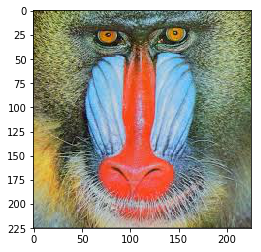

In [20]:
import numpy as np
from skimage.feature import corner_harris, corner_peaks
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import skimage.io as io
from skimage.exposure import equalize_hist

image = io.imread('images.jpg')
plt.imshow(image)

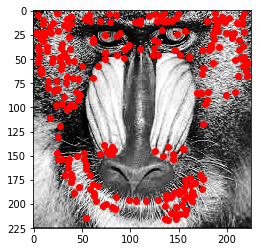

Points of Interest found: 236


In [21]:
def mark_corners(corners, image):
    y_corner, x_corner = zip(*corners)
    plt.imshow(image, cmap='gray')
    plt.plot(x_corner, y_corner, 'ro')
    plt.show()
    
image = equalize_hist(rgb2gray(image))
corners = corner_peaks(corner_harris(image), min_distance=2)
mark_corners(corners, image)
print 'Points of Interest found: %d' %len(corners)

### SIFT AND SURF

**SIFT- Scale Invariant Feature Transform**
**SURF- Speed Up Robust Featues**

Scale-Invariant Feature Transform (SIFT) is a method for extracting features from an image that is less sensitive to the **scale, rotation, and illumination** of the image than the extraction methods we have previously discussed.
Speeded-Up Robust Features (SURF) is another method of extracting interesting points of an image and creating descriptions that are invariant of the **image's scale, orientation, and illumination**.

We can use `mahotas` library for extracting SIFT and SURF features.

Like the extracted points of interest, the extracted SURF are only the first step in creating a feature representation that could be used in a machine learning task.
Different SURF will be extracted for each instance in the training set.

In [22]:
import mahotas as mh
from mahotas.features import surf

image = mh.imread('images.jpg', as_grey=True)
print 'Extracted SURF featues are: ', surf.surf(image)
print 'Shape of Image: ', image.shape, 'Shape of SURF: ', surf.surf(image).shape

Extracted SURF featues are:  [[  4.89342559e+01   1.24989753e+02   1.94713464e+00 ...,  -1.69645958e-04
    1.49705164e-02   3.98822338e-03]
 [  5.17278347e+01   8.77110011e+01   2.63757869e+00 ...,   3.98965897e-03
    8.69251518e-03   4.18659399e-03]
 [  5.12818683e+01   8.96875643e+01   1.85334453e+00 ...,   6.73985819e-04
    1.72622160e-02   5.40833728e-03]
 ..., 
 [  1.51355717e+02   1.39327124e+02   4.42390130e+00 ...,   1.29702796e-03
    1.13550591e-02   2.95204151e-03]
 [  9.50010069e+01   1.28000000e+02   4.40000000e+00 ...,  -6.60812577e-03
    8.31668949e-03   6.60812577e-03]
 [  8.10246490e+01   1.42000000e+02   2.80000000e+00 ...,   9.71564440e-03
    2.43531130e-02   2.84558758e-02]]
Shape of Image:  (225, 225) Shape of SURF:  (181, 70)


NOTE: *The shape of image and SURF is not same*

## Data Standardization
Many estimators perform better when they are trained on standardized data sets. Standardized data has zero mean and unit variance. An explanatory variable with zero mean is centered about the origin; its average value is zero.

Some learning algorithms also converge to the optimal parameter
values more slowly when data is not standardized. The value of an explanatory variable can be standardized by subtracting the variable's mean and dividing the difference by the variable's standard deviation. Data can be easily standardized using scikit-learn's `scale` function

In [23]:
from sklearn.preprocessing import scale
import numpy as np

X = np.random.randint(10,100,100). reshape(10,10).astype(float)
print X

[[ 91.  13.  58.  89.  64.  42.  36.  30.  41.  52.]
 [ 51.  24.  34.  25.  19.  54.  14.  49.  63.  93.]
 [ 51.  57.  66.  54.  68.  87.  24.  67.  67.  82.]
 [ 52.  90.  56.  61.  32.  86.  45.  64.  16.  45.]
 [ 50.  65.  88.  75.  78.  90.  66.  48.  19.  75.]
 [ 52.  14.  68.  29.  41.  27.  63.  93.  92.  91.]
 [ 34.  36.  46.  73.  77.  89.  67.  33.  90.  94.]
 [ 38.  89.  11.  48.  27.  16.  22.  68.  69.  18.]
 [ 76.  40.  53.  19.  45.  79.  27.  30.  63.  61.]
 [ 72.  28.  85.  82.  41.  78.  56.  78.  13.  33.]]


In [24]:
print 'Scaled X is: ', scale(X)

Scaled X is:  [[ 2.04904882 -1.20473319  0.06898101  1.42014188  0.73746014 -0.86264675
  -0.31552737 -1.27231048 -0.44012579 -0.48620348]
 [-0.34051249 -0.79822813 -1.03471518 -1.29296499 -1.50481731 -0.40862214
  -1.47246107 -0.34254513  0.34709107  1.1214048 ]
 [-0.34051249  0.42128707  0.43687974 -0.06358844  0.93677369  0.83994552
  -0.94658211  0.5382852   0.4902214   0.69009526]
 [-0.28077345  1.64080226 -0.02299367  0.23315762 -0.85704827  0.80211014
   0.15776369  0.39148015 -1.33469039 -0.76067319]
 [-0.40025152  0.71692711  1.44860125  0.82664975  1.43505756  0.95345167
   1.26210949 -0.39148015 -1.22734264  0.41562556]
 [-0.28077345 -1.16777818  0.52885443 -1.12339581 -0.40859278 -1.43017751
   1.1043458   1.81059568  1.38478601  1.04298489]
 [-1.35607604 -0.35476806 -0.48286708  0.74186516  1.38522917  0.91561629
   1.31469738 -1.12550542  1.31322084  1.16061476]
 [-1.11711991  1.60384725 -2.09242403 -0.31794221 -1.1061902  -1.84636673
  -1.0517579   0.58722022  0.56178657

## Important References